In [1]:
import numpy as np
import pandas as pd

In [61]:
plans = pd.read_csv(r"C:\Users\THINKPAD\OneDrive\Desktop\PANDAS_CASE_STUDY\Case_study_3\plans.csv")
plans

,Unnamed: 0,plan_id,plan_name,price
0,0,0,trial,0.0
1,1,1,basic monthly,9.9
2,2,2,pro monthly,19.9
3,3,3,pro annual,199.0
4,4,4,churn,NaN


In [62]:
plans = pd.read_csv(r"C:\Users\THINKPAD\OneDrive\Desktop\PANDAS_CASE_STUDY\Case_study_3\plans.csv",index_col = 0)
subscriptions = pd.read_csv(r"C:\Users\THINKPAD\OneDrive\Desktop\PANDAS_CASE_STUDY\Case_study_3\subscriptions.csv",index_col = 0)

In [4]:
plans

,plan_id,plan_name,price
0,0,trial,0.0
1,1,basic monthly,9.9
2,2,pro monthly,19.9
3,3,pro annual,199.0
4,4,churn,NaN


In [5]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   plan_id    5 non-null      int64  
 1   plan_name  5 non-null      object 
 2   price      4 non-null      float64
dtypes: float64(1), int64(1), object(1)
memory usage: 160.0+ bytes


In [6]:
subscriptions

,customer_id,plan_id,start_date
0,1,0,2020-08-01
1,1,1,2020-08-08
2,2,0,2020-09-20
3,2,3,2020-09-27
4,3,0,2020-01-13
...,...,...,...
2645,999,2,2020-10-30
2646,999,4,2020-12-01
2647,1000,0,2020-03-19
2648,1000,2,2020-03-26


In [7]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2650 entries, 0 to 2649
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  2650 non-null   int64 
 1   plan_id      2650 non-null   int64 
 2   start_date   2650 non-null   object
dtypes: int64(2), object(1)
memory usage: 82.8+ KB


In [63]:
 subscriptions['start_date'] =subscriptions['start_date'].apply(pd.to_datetime)

In [9]:
subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2650 entries, 0 to 2649
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   customer_id  2650 non-null   int64         
 1   plan_id      2650 non-null   int64         
 2   start_date   2650 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 82.8 KB


In [10]:
subscriptions['start_date'].dt.year.unique()

array([2020, 2021])

## Data Analysis Questions

### 1. How many customers has Foodie-Fi ever had?

In [11]:
subscriptions['customer_id'].nunique()

1000

### 2. What is the monthly distribution of trial plan start_date values for our dataset - use the start of the month as the group by value

In [12]:
plans.loc[plans['plan_name'] == 'trial', 'plan_id']

0    0
Name: plan_id, dtype: int64

In [13]:
# Identify the plan_id for the 'trial' plan from the 'plans' DataFrame
trial_plan_id = plans.loc[plans['plan_name'] == 'trial', 'plan_id'].iloc[0]
trial_plan_id

0

In [14]:
# Merge 'subscriptions' with 'plans' to get the plan_name
merged_df = pd.merge(subscriptions, plans, on='plan_id', how='inner')
merged_df

,customer_id,plan_id,start_date,plan_name,price
0,1,0,2020-08-01,trial,0.0
1,2,0,2020-09-20,trial,0.0
2,3,0,2020-01-13,trial,0.0
3,4,0,2020-01-17,trial,0.0
4,5,0,2020-08-03,trial,0.0
...,...,...,...,...,...
2645,995,2,2020-12-06,pro monthly,19.9
2646,997,2,2020-08-26,pro monthly,19.9
2647,998,2,2020-10-19,pro monthly,19.9
2648,999,2,2020-10-30,pro monthly,19.9


In [15]:
trial_data = merged_df[merged_df['plan_id'] == trial_plan_id].copy()  # Add .copy() here
trial_data

,customer_id,plan_id,start_date,plan_name,price
0,1,0,2020-08-01,trial,0.0
1,2,0,2020-09-20,trial,0.0
2,3,0,2020-01-13,trial,0.0
3,4,0,2020-01-17,trial,0.0
4,5,0,2020-08-03,trial,0.0
...,...,...,...,...,...
995,996,0,2020-11-11,trial,0.0
996,997,0,2020-07-27,trial,0.0
997,998,0,2020-10-12,trial,0.0
998,999,0,2020-10-23,trial,0.0


In [16]:
# Extract month and year from 'start_date'
trial_data['month_no'] = trial_data['start_date'].dt.month
trial_data['month_name'] = trial_data['start_date'].dt.strftime('%B')
trial_data

,customer_id,plan_id,start_date,plan_name,price,month_no,month_name
0,1,0,2020-08-01,trial,0.0,8,August
1,2,0,2020-09-20,trial,0.0,9,September
2,3,0,2020-01-13,trial,0.0,1,January
3,4,0,2020-01-17,trial,0.0,1,January
4,5,0,2020-08-03,trial,0.0,8,August
...,...,...,...,...,...,...,...
995,996,0,2020-11-11,trial,0.0,11,November
996,997,0,2020-07-27,trial,0.0,7,July
997,998,0,2020-10-12,trial,0.0,10,October
998,999,0,2020-10-23,trial,0.0,10,October


### %d: Day of the month as a zero-padded decimal number (01, 02, ..., 31).
### %m: Month as a zero-padded decimal number (01, 02, ..., 12).
### %Y: Year with century as a decimal number (0001, 0002, ..., 2013, 2014, ..., 9998, 9999).
### %y: Year without century as a zero-padded decimal number (00, 01, ..., 99).
### %H: Hour (00, 01, ..., 23).
### %M: Minute (00, 01, ..., 59).
### %S: Second (00, 01, ..., 59).

In [17]:
xx = trial_data.groupby(['month_no', 'month_name'])
xx.get_group((1, 'January')).shape

(88, 7)

In [18]:
# Extract month and count customers
result_df = trial_data.groupby(['month_no', 'month_name']).size().reset_index(name='customer_count')
result_df

,month_no,month_name,customer_count
0,1,January,88
1,2,February,68
2,3,March,94
3,4,April,81
4,5,May,88
5,6,June,79
6,7,July,89
7,8,August,88
8,9,September,87
9,10,October,79


In [19]:
# Sort the DataFrame by customer_count in descending order
result_df = result_df.sort_values(by='month_no')
result_df

,month_no,month_name,customer_count
0,1,January,88
1,2,February,68
2,3,March,94
3,4,April,81
4,5,May,88
5,6,June,79
6,7,July,89
7,8,August,88
8,9,September,87
9,10,October,79


In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='month_name', ylabel='customer_count'>

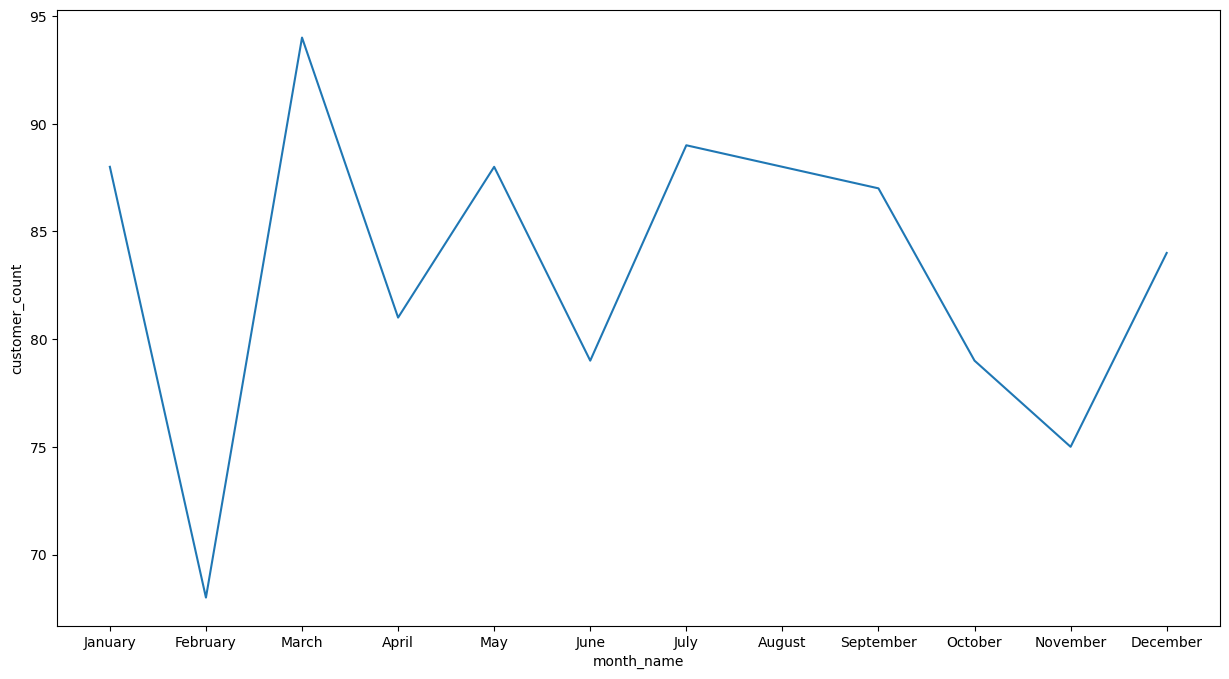

In [21]:
plt.figure(figsize=(15,8))
sns.lineplot(result_df,x='month_name',y='customer_count')

# Take out the year also for the same data and  give the graph too

In [22]:

# Identify the plan_id for the 'trial' plan from the 'plans' DataFrame
trial_plan_id = plans.loc[plans['plan_name'] == 'trial', 'plan_id'].iloc[0]

# Merge 'subscriptions' with 'plans' to get the plan_name
merged_df = pd.merge(subscriptions, plans, on='plan_id', how='inner')

# Filter rows where the plan is 'trial'
trial_data = merged_df[merged_df['plan_id'] == trial_plan_id].copy()  # Add .copy() here

# Extract month and year from 'start_date'
trial_data['month_no'] = trial_data['start_date'].dt.month
trial_data['month_name'] = trial_data['start_date'].dt.strftime('%B')

# Extract month and count customers
result_df = trial_data.groupby(['month_no', 'month_name']).size().reset_index(name='customer_count')

# Sort the DataFrame by customer_count in descending order
result_df = result_df.sort_values(by='month_no')

# Display the result DataFrame
result_df

,month_no,month_name,customer_count
0,1,January,88
1,2,February,68
2,3,March,94
3,4,April,81
4,5,May,88
5,6,June,79
6,7,July,89
7,8,August,88
8,9,September,87
9,10,October,79


### 3. What plan start_date values occur after the year 2020 for our dataset? Show the breakdown by count of events for each plan_name

In [23]:
# Merge 'subscriptions' with 'plans' to get plan_name
merged_df = pd.merge(subscriptions, plans, on='plan_id', how='inner')

# Filter rows where the start_date year is greater than 2020
filtered_data = merged_df[merged_df['start_date'].dt.year > 2020]

# Group by plan_id and calculate the count of events
result_df = filtered_data.groupby(['plan_id', 'plan_name']).size().reset_index(name='count of events')

# Display the result DataFrame
result_df 

,plan_id,plan_name,count of events
0,1,basic monthly,8
1,2,pro monthly,60
2,3,pro annual,63
3,4,churn,71


In [24]:
filtered_data

,customer_id,plan_id,start_date,plan_name,price
1076,140,1,2021-01-01,basic monthly,9.9
1161,304,1,2021-01-04,basic monthly,9.9
1230,431,1,2021-01-03,basic monthly,9.9
1234,436,1,2021-01-03,basic monthly,9.9
1394,712,1,2021-01-02,basic monthly,9.9
...,...,...,...,...,...
2572,871,2,2021-03-07,pro monthly,19.9
2599,913,2,2021-01-03,pro monthly,19.9
2609,925,2,2021-02-04,pro monthly,19.9
2621,944,2,2021-01-14,pro monthly,19.9


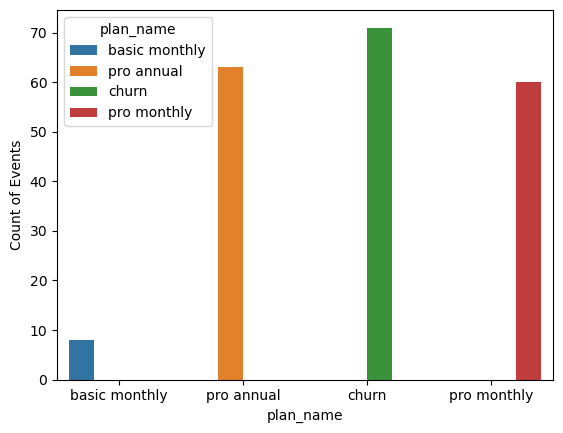

In [25]:
sns.countplot(data=filtered_data, x='plan_name',hue='plan_name')
plt.ylabel('Count of Events')
plt.show()

### 4. What is the customer count and percentage of customers who have churned rounded to 1 decimal place?

In [26]:
# Merge 'subscriptions' with 'plans' to get plan_name
merged_df = pd.merge(subscriptions, plans, on='plan_id', how='inner')
merged_df

,customer_id,plan_id,start_date,plan_name,price
0,1,0,2020-08-01,trial,0.0
1,2,0,2020-09-20,trial,0.0
2,3,0,2020-01-13,trial,0.0
3,4,0,2020-01-17,trial,0.0
4,5,0,2020-08-03,trial,0.0
...,...,...,...,...,...
2645,995,2,2020-12-06,pro monthly,19.9
2646,997,2,2020-08-26,pro monthly,19.9
2647,998,2,2020-10-19,pro monthly,19.9
2648,999,2,2020-10-30,pro monthly,19.9


In [27]:
# Filter rows where plan_id is 4
filtered_data = merged_df[merged_df['plan_id'] == 4]
filtered_data

,customer_id,plan_id,start_date,plan_name,price
1804,4,4,2020-04-21,churn,NaN
1805,6,4,2021-02-26,churn,NaN
1806,11,4,2020-11-26,churn,NaN
1807,15,4,2020-04-29,churn,NaN
1808,21,4,2020-09-27,churn,NaN
...,...,...,...,...,...
2106,993,4,2020-11-07,churn,NaN
2107,996,4,2020-12-07,churn,NaN
2108,997,4,2020-11-14,churn,NaN
2109,999,4,2020-12-01,churn,NaN


In [28]:
# Calculate churn percentage
distinct_customers_total = subscriptions['customer_id'].nunique()
churn_percentage = round(100 * (filtered_data['customer_id'].nunique() / distinct_customers_total), 2)
churn_percentage 

30.7

In [29]:
round(100*len(filtered_data)/distinct_customers_total,2)

30.7

In [30]:
# Display the result
print('churned customers' ,len(filtered_data))
print('distinct_customers_total' ,distinct_customers_total)
print("Churn Percentage:", churn_percentage)


churned customers 307
distinct_customers_total 1000
Churn Percentage: 30.7


In [31]:
# Merge 'subscriptions' with 'plans' to get plan_name
merged_df = pd.merge(subscriptions, plans, on='plan_id', how='inner')

# Filter rows where plan_id is 4
filtered_data = merged_df[merged_df['plan_id'] == 4]

# Calculate churn percentage
distinct_customers_total = subscriptions['customer_id'].nunique()
churn_percentage = round(100 * filtered_data['customer_id'].nunique() / distinct_customers_total, 2)

# Display the result
print('churned customers' ,len(filtered_data))
print('distinct_customers_total' ,distinct_customers_total)
print("Churn Percentage:", churn_percentage)


churned customers 307
distinct_customers_total 1000
Churn Percentage: 30.7


### 5. How many customers have churned straight after their initial free trial - what percentage is this rounded to the nearest whole number?

In [32]:
# Merge 'subscriptions' with 'plans' to get plan_name
merged_df = pd.merge(subscriptions, plans, on='plan_id', how='inner')
merged_df

,customer_id,plan_id,start_date,plan_name,price
0,1,0,2020-08-01,trial,0.0
1,2,0,2020-09-20,trial,0.0
2,3,0,2020-01-13,trial,0.0
3,4,0,2020-01-17,trial,0.0
4,5,0,2020-08-03,trial,0.0
...,...,...,...,...,...
2645,995,2,2020-12-06,pro monthly,19.9
2646,997,2,2020-08-26,pro monthly,19.9
2647,998,2,2020-10-19,pro monthly,19.9
2648,999,2,2020-10-30,pro monthly,19.9


In [33]:
subscriptions.sort_values(['customer_id', 'start_date'])


,customer_id,plan_id,start_date
0,1,0,2020-08-01
1,1,1,2020-08-08
2,2,0,2020-09-20
3,2,3,2020-09-27
4,3,0,2020-01-13
...,...,...,...
2645,999,2,2020-10-30
2646,999,4,2020-12-01
2647,1000,0,2020-03-19
2648,1000,2,2020-03-26


In [34]:
# Create a column for the next plan using shift
subscriptions['next_plan'] = subscriptions.sort_values(['customer_id', 'start_date']).groupby('customer_id')['plan_id'].shift(-1)
subscriptions

,customer_id,plan_id,start_date,next_plan
0,1,0,2020-08-01,1.0
1,1,1,2020-08-08,NaN
2,2,0,2020-09-20,3.0
3,2,3,2020-09-27,NaN
4,3,0,2020-01-13,1.0
...,...,...,...,...
2645,999,2,2020-10-30,4.0
2646,999,4,2020-12-01,NaN
2647,1000,0,2020-03-19,2.0
2648,1000,2,2020-03-26,4.0


In [35]:
subscriptions.head(15)

,customer_id,plan_id,start_date,next_plan
0,1,0,2020-08-01,1.0
1,1,1,2020-08-08,NaN
2,2,0,2020-09-20,3.0
3,2,3,2020-09-27,NaN
4,3,0,2020-01-13,1.0
5,3,1,2020-01-20,NaN
6,4,0,2020-01-17,1.0
7,4,1,2020-01-24,4.0
8,4,4,2020-04-21,NaN
9,5,0,2020-08-03,1.0


In [36]:
# Filter rows where next_plan is 4 and current plan is 0
churners = subscriptions[(subscriptions['next_plan'] == 4) & (subscriptions['plan_id'] == 0)]
churners

,customer_id,plan_id,start_date,next_plan
24,11,0,2020-11-19,4.0
266,99,0,2020-12-05,4.0
291,108,0,2020-09-10,4.0
330,122,0,2020-03-30,4.0
346,128,0,2020-01-19,4.0
...,...,...,...,...
2578,973,0,2020-01-08,4.0
2609,985,0,2020-08-02,4.0
2614,987,0,2020-01-05,4.0
2616,988,0,2020-05-02,4.0


In [37]:
# Calculate churn after trial count
churn_after_trial_count = churners['customer_id'].nunique() 

In [38]:
# Calculate distinct customers
distinct_customers_total = subscriptions['customer_id'].nunique()

In [39]:
# Calculate churn percentage
churn_percentage = round(100 * churn_after_trial_count / distinct_customers_total, 2)

# Display the result
print("Churn after trial count:", churn_after_trial_count)
print("Churn percentage:", churn_percentage)

Churn after trial count: 92
Churn percentage: 9.2


In [40]:
# Create a column for the next plan using shift
subscriptions['next_plan'] = subscriptions.sort_values(['customer_id', 'start_date']).groupby('customer_id')['plan_id'].shift(-1)

# Filter rows where next_plan is 4 and current plan is 0
churners = subscriptions[(subscriptions['next_plan'] == 4) & (subscriptions['plan_id'] == 0)]

# Calculate churn after trial count
churn_after_trial_count = churners['customer_id'].nunique() 

# Calculate distinct customers
distinct_customers_total = subscriptions['customer_id'].nunique()

# Calculate churn percentage
churn_percentage = round(100 * churn_after_trial_count / distinct_customers_total, 2)

# Display the result
print("Churn after trial count:", churn_after_trial_count)
print("Churn percentage:", churn_percentage)

Churn after trial count: 92
Churn percentage: 9.2


## Explainning the shift

- In pandas, the shift method is used to shift the values of a column in a DataFrame. When you specify shift(-1), it shifts the values down by one position. Here's how it works:

In [41]:
# Sample DataFrame
data = {'customer_id': [1, 1, 2, 2, 3],
        'plan_id': [0, 1, 0, 3, 0],
        'start_date': ['2020-01-01', '2020-02-01', '2020-03-01', '2020-04-01', '2020-05-01']}
subscriptions = pd.DataFrame(data)
subscriptions['start_date'] = pd.to_datetime(subscriptions['start_date'])

# Sort DataFrame by customer_id and start_date
subscriptions = subscriptions.sort_values(by=['customer_id', 'start_date'])

subscriptions 

,customer_id,plan_id,start_date
0,1,0,2020-01-01
1,1,1,2020-02-01
2,2,0,2020-03-01
3,2,3,2020-04-01
4,3,0,2020-05-01


In [42]:
# Create a column for the next plan using shift
subscriptions['next_plan'] = subscriptions.groupby('customer_id')['plan_id'].shift(-1)

subscriptions

,customer_id,plan_id,start_date,next_plan
0,1,0,2020-01-01,1.0
1,1,1,2020-02-01,NaN
2,2,0,2020-03-01,3.0
3,2,3,2020-04-01,NaN
4,3,0,2020-05-01,NaN


### 6. What is the number and percentage of customer plans after their initial free trial?

In [43]:
# Merge 'subscriptions' with 'plans' to get plan_name
merged_df = pd.merge(subscriptions, plans, on='plan_id', how='inner')
merged_df

,customer_id,plan_id,start_date,next_plan,plan_name,price
0,1,0,2020-01-01,1.0,trial,0.0
1,2,0,2020-03-01,3.0,trial,0.0
2,3,0,2020-05-01,NaN,trial,0.0
3,1,1,2020-02-01,NaN,basic monthly,9.9
4,2,3,2020-04-01,NaN,pro annual,199.0


In [44]:
# Filter rows where plan_name is not 'trial'
filtered_data = merged_df[merged_df['plan_name'] != 'trial']
filtered_data

,customer_id,plan_id,start_date,next_plan,plan_name,price
3,1,1,2020-02-01,NaN,basic monthly,9.9
4,2,3,2020-04-01,NaN,pro annual,199.0


In [45]:
# Calculate customer count and distinct customers
customer_count = filtered_data.groupby('plan_name')['customer_id'].count().reset_index(name='customer_count')
customer_count

,plan_name,customer_count
0,basic monthly,1
1,pro annual,1


In [46]:
distinct_customers_total = subscriptions['customer_id'].nunique()

# Calculate customer percentage
customer_count['customer_percentage'] = round(100 * customer_count['customer_count'] / distinct_customers_total, 2)

# Display the result DataFrame
customer_count.sort_values(by='customer_count')

,plan_name,customer_count,customer_percentage
0,basic monthly,1,33.33
1,pro annual,1,33.33


In [47]:
# Merge 'subscriptions' with 'plans' to get plan_name
merged_df = pd.merge(subscriptions, plans, on='plan_id', how='inner')

# Filter rows where plan_name is not 'trial'
filtered_data = merged_df[merged_df['plan_name'] != 'trial']

# Calculate customer count and distinct customers
customer_count = filtered_data.groupby('plan_name')['customer_id'].count().reset_index(name='customer_count')
distinct_customers_total = subscriptions['customer_id'].nunique()

# Calculate customer percentage
customer_count['customer_percentage'] = round(100 * customer_count['customer_count'] / distinct_customers_total, 2)

# Display the result DataFrame
customer_count.sort_values(by='customer_count')

,plan_name,customer_count,customer_percentage
0,basic monthly,1,33.33
1,pro annual,1,33.33


### 7. What is the customer count and percentage breakdown of all 5 plan_name values at 2020-12-31?

In [48]:
# Merge 'subscriptions' with 'plans' to get plan_name
merged_df = pd.merge(subscriptions, plans, on='plan_id', how='inner')
merged_df

,customer_id,plan_id,start_date,next_plan,plan_name,price
0,1,0,2020-01-01,1.0,trial,0.0
1,2,0,2020-03-01,3.0,trial,0.0
2,3,0,2020-05-01,NaN,trial,0.0
3,1,1,2020-02-01,NaN,basic monthly,9.9
4,2,3,2020-04-01,NaN,pro annual,199.0


In [49]:
# Filter rows based on the condition
filtered_data = merged_df[(merged_df['start_date'] <= '2020-12-31')]
filtered_data

,customer_id,plan_id,start_date,next_plan,plan_name,price
0,1,0,2020-01-01,1.0,trial,0.0
1,2,0,2020-03-01,3.0,trial,0.0
2,3,0,2020-05-01,NaN,trial,0.0
3,1,1,2020-02-01,NaN,basic monthly,9.9
4,2,3,2020-04-01,NaN,pro annual,199.0


In [50]:
# Create a column for the latest_plan using rank
filtered_data['latest_plan'] = filtered_data.groupby('customer_id')['start_date'].rank(ascending=False, method='first')
filtered_data

,customer_id,plan_id,start_date,next_plan,plan_name,price,latest_plan
0,1,0,2020-01-01,1.0,trial,0.0,2.0
1,2,0,2020-03-01,3.0,trial,0.0,2.0
2,3,0,2020-05-01,NaN,trial,0.0,1.0
3,1,1,2020-02-01,NaN,basic monthly,9.9,1.0
4,2,3,2020-04-01,NaN,pro annual,199.0,1.0


In [51]:
# Filter rows where latest_plan is 1
latest_plan_data = filtered_data[filtered_data['latest_plan'] == 1]
latest_plan_data

,customer_id,plan_id,start_date,next_plan,plan_name,price,latest_plan
2,3,0,2020-05-01,NaN,trial,0.0,1.0
3,1,1,2020-02-01,NaN,basic monthly,9.9,1.0
4,2,3,2020-04-01,NaN,pro annual,199.0,1.0


In [52]:
# Calculate customer count and percentage breakdown
customer_count = latest_plan_data.groupby('plan_id')['customer_id'].count().reset_index(name='customer_count')
customer_count

,plan_id,customer_count
0,0,1
1,1,1
2,3,1


In [53]:
distinct_customers_total = subscriptions['customer_id'].nunique()
customer_count['percentage_breakdown'] = round(100 * customer_count['customer_count'] / distinct_customers_total, 2)

# Display the result DataFrame
customer_count.sort_values(by='plan_id')

,plan_id,customer_count,percentage_breakdown
0,0,1,33.33
1,1,1,33.33
2,3,1,33.33


In [54]:
# Merge 'subscriptions' with 'plans' to get plan_name
merged_df = pd.merge(subscriptions, plans, on='plan_id', how='inner')

# Filter rows based on the condition
filtered_data = merged_df[(merged_df['start_date'] <= '2020-12-31')]

# Create a column for the latest_plan using rank
filtered_data['latest_plan'] = filtered_data.groupby('customer_id')['start_date'].rank(ascending=False, method='first')

# Filter rows where latest_plan is 1
latest_plan_data = filtered_data[filtered_data['latest_plan'] == 1]

# Calculate customer count and percentage breakdown
customer_count = latest_plan_data.groupby('plan_id')['customer_id'].count().reset_index(name='customer_count')
distinct_customers_total = subscriptions['customer_id'].nunique()

customer_count['percentage_breakdown'] = round(100 * customer_count['customer_count'] / distinct_customers_total, 2)

# Display the result DataFrame
customer_count.sort_values(by='plan_id')

,plan_id,customer_count,percentage_breakdown
0,0,1,33.33
1,1,1,33.33
2,3,1,33.33


### 8. How many customers have upgraded to an annual plan in 2020?

In [64]:
merged_df = pd.merge(subscriptions, plans, on='plan_id', how='inner')

In [65]:
merged_df

,customer_id,plan_id,start_date,plan_name,price
0,1,0,2020-08-01,trial,0.0
1,2,0,2020-09-20,trial,0.0
2,3,0,2020-01-13,trial,0.0
3,4,0,2020-01-17,trial,0.0
4,5,0,2020-08-03,trial,0.0
...,...,...,...,...,...
2645,995,2,2020-12-06,pro monthly,19.9
2646,997,2,2020-08-26,pro monthly,19.9
2647,998,2,2020-10-19,pro monthly,19.9
2648,999,2,2020-10-30,pro monthly,19.9


In [66]:
len(merged_df[(merged_df['start_date'].dt.year == 2020)&(merged_df['plan_name']=='pro annual')])


195

### 9. How many days on average does it take for a customer to an annual plan from the day they join Foodie-Fi?

In [57]:
# Create a column for the next plan using shift
#subscriptions['next_plan'] = subscriptions.sort_values(['customer_id', 'start_date']).groupby('customer_id')['plan_id'].shift(-1)

In [67]:
# Merge 'subscriptions' with 'plans' for trial plan customers
trial_plan_customer_df = pd.merge(subscriptions[subscriptions['plan_id'] == 0], plans, on='plan_id', how='inner')
trial_plan_customer_df

,customer_id,plan_id,start_date,plan_name,price
0,1,0,2020-08-01,trial,0.0
1,2,0,2020-09-20,trial,0.0
2,3,0,2020-01-13,trial,0.0
3,4,0,2020-01-17,trial,0.0
4,5,0,2020-08-03,trial,0.0
...,...,...,...,...,...
995,996,0,2020-11-11,trial,0.0
996,997,0,2020-07-27,trial,0.0
997,998,0,2020-10-12,trial,0.0
998,999,0,2020-10-23,trial,0.0


In [68]:
# Merge 'subscriptions' with 'plans' for annual plan customers
annual_plan_customer_df = pd.merge(subscriptions[subscriptions['plan_id'] == 3], plans, on='plan_id', how='inner')
annual_plan_customer_df

,customer_id,plan_id,start_date,plan_name,price
0,2,3,2020-09-27,pro annual,199.0
1,9,3,2020-12-14,pro annual,199.0
2,16,3,2020-10-21,pro annual,199.0
3,17,3,2020-12-11,pro annual,199.0
4,19,3,2020-08-29,pro annual,199.0
...,...,...,...,...,...
253,974,3,2020-10-16,pro annual,199.0
254,975,3,2021-04-30,pro annual,199.0
255,976,3,2021-02-13,pro annual,199.0
256,978,3,2020-11-03,pro annual,199.0


In [69]:
# Merge the two DataFrames on 'customer_id'
merged_df = pd.merge(trial_plan_customer_df, annual_plan_customer_df, on='customer_id', suffixes=('_trial', '_annual'))
merged_df

,customer_id,plan_id_trial,start_date_trial,plan_name_trial,price_trial,plan_id_annual,start_date_annual,plan_name_annual,price_annual
0,2,0,2020-09-20,trial,0.0,3,2020-09-27,pro annual,199.0
1,9,0,2020-12-07,trial,0.0,3,2020-12-14,pro annual,199.0
2,16,0,2020-05-31,trial,0.0,3,2020-10-21,pro annual,199.0
3,17,0,2020-07-27,trial,0.0,3,2020-12-11,pro annual,199.0
4,19,0,2020-06-22,trial,0.0,3,2020-08-29,pro annual,199.0
...,...,...,...,...,...,...,...,...,...
253,974,0,2020-09-10,trial,0.0,3,2020-10-16,pro annual,199.0
254,975,0,2020-11-15,trial,0.0,3,2021-04-30,pro annual,199.0
255,976,0,2020-11-11,trial,0.0,3,2021-02-13,pro annual,199.0
256,978,0,2020-08-27,trial,0.0,3,2020-11-03,pro annual,199.0


In [70]:
# Calculate the difference in start dates and then calculate the average
merged_df['conversion_days'] = (merged_df['start_date_annual'] - merged_df['start_date_trial']).dt.days
merged_df

,customer_id,plan_id_trial,start_date_trial,plan_name_trial,price_trial,plan_id_annual,start_date_annual,plan_name_annual,price_annual,conversion_days
0,2,0,2020-09-20,trial,0.0,3,2020-09-27,pro annual,199.0,7
1,9,0,2020-12-07,trial,0.0,3,2020-12-14,pro annual,199.0,7
2,16,0,2020-05-31,trial,0.0,3,2020-10-21,pro annual,199.0,143
3,17,0,2020-07-27,trial,0.0,3,2020-12-11,pro annual,199.0,137
4,19,0,2020-06-22,trial,0.0,3,2020-08-29,pro annual,199.0,68
...,...,...,...,...,...,...,...,...,...,...
253,974,0,2020-09-10,trial,0.0,3,2020-10-16,pro annual,199.0,36
254,975,0,2020-11-15,trial,0.0,3,2021-04-30,pro annual,199.0,166
255,976,0,2020-11-11,trial,0.0,3,2021-02-13,pro annual,199.0,94
256,978,0,2020-08-27,trial,0.0,3,2020-11-03,pro annual,199.0,68


In [71]:
avg_conversion_days = round(merged_df['conversion_days'].mean(), 2)

print("Average Conversion Days:", avg_conversion_days)

Average Conversion Days: 104.62


In [72]:
# Merge 'subscriptions' with 'plans' for trial plan customers
trial_plan_customer_df = pd.merge(subscriptions[subscriptions['plan_id'] == 0], plans, on='plan_id', how='inner')

# Merge 'subscriptions' with 'plans' for annual plan customers
annual_plan_customer_df = pd.merge(subscriptions[subscriptions['plan_id'] == 3], plans, on='plan_id', how='inner')

# Merge the two DataFrames on 'customer_id'
merged_df = pd.merge(trial_plan_customer_df, annual_plan_customer_df, on='customer_id', suffixes=('_trial', '_annual'))

# Calculate the difference in start dates and then calculate the average
merged_df['conversion_days'] = (merged_df['start_date_annual'] - merged_df['start_date_trial']).dt.days
avg_conversion_days = round(merged_df['conversion_days'].mean(), 2)

print("Average Conversion Days:", avg_conversion_days)

Average Conversion Days: 104.62


The suffixes=('_trial', '_annual') parameter in the pd.merge function is used to add suffixes to the column names of the overlapping columns from the two DataFrames being merged. This is necessary because both DataFrames (trial_plan_customer_df and annual_plan_customer_df) have some common column names, and adding suffixes helps to distinguish between them.

Here's a breakdown of how it works:

'_trial' will be added as a suffix to the column names of the columns from the trial_plan_customer_df DataFrame.
'_annual' will be added as a suffix to the column names of the columns from the annual_plan_customer_df DataFrame.
For example, if both DataFrames have a column named 'start_date', after merging, the resulting DataFrame will have columns named 'start_date_trial' and 'start_date_annual', making it clear which column corresponds to which DataFrame.

### 10. Can you further breakdown this average value into 30 day periods (i.e. 0-30 days, 31-60 days etc)

In [73]:
# Create the 'next_plan_cte' DataFrame
next_plan_cte = subscriptions.copy()
next_plan_cte['next_plan_start_date'] = next_plan_cte.groupby('customer_id')['start_date'].shift(-1)
next_plan_cte['next_plan'] = next_plan_cte.groupby('customer_id')['plan_id'].shift(-1)

next_plan_cte

,customer_id,plan_id,start_date,next_plan_start_date,next_plan
0,1,0,2020-08-01,2020-08-08,1.0
1,1,1,2020-08-08,NaT,NaN
2,2,0,2020-09-20,2020-09-27,3.0
3,2,3,2020-09-27,NaT,NaN
4,3,0,2020-01-13,2020-01-20,1.0
...,...,...,...,...,...
2645,999,2,2020-10-30,2020-12-01,4.0
2646,999,4,2020-12-01,NaT,NaN
2647,1000,0,2020-03-19,2020-03-26,2.0
2648,1000,2,2020-03-26,2020-06-04,4.0


In [74]:

# Create the 'window_details_cte' DataFrame
window_details_cte = next_plan_cte[next_plan_cte['next_plan'] == 3].copy()
window_details_cte

,customer_id,plan_id,start_date,next_plan_start_date,next_plan
2,2,0,2020-09-20,2020-09-27,3.0
20,9,0,2020-12-07,2020-12-14,3.0
37,16,1,2020-06-07,2020-10-21,3.0
40,17,1,2020-08-03,2020-12-11,3.0
45,19,2,2020-06-29,2020-08-29,3.0
...,...,...,...,...,...
2581,974,1,2020-09-17,2020-10-16,3.0
2584,975,1,2020-11-22,2021-04-30,3.0
2587,976,1,2020-11-18,2021-02-13,3.0
2593,978,2,2020-09-03,2020-11-03,3.0


In [75]:
window_details_cte['days'] = (window_details_cte['next_plan_start_date'] - window_details_cte['start_date']).dt.days
window_details_cte['window_30_days'] = round(window_details_cte['days'] / 30)
window_details_cte

,customer_id,plan_id,start_date,next_plan_start_date,next_plan,days,window_30_days
2,2,0,2020-09-20,2020-09-27,3.0,7,0.0
20,9,0,2020-12-07,2020-12-14,3.0,7,0.0
37,16,1,2020-06-07,2020-10-21,3.0,136,5.0
40,17,1,2020-08-03,2020-12-11,3.0,130,4.0
45,19,2,2020-06-29,2020-08-29,3.0,61,2.0
...,...,...,...,...,...,...,...
2581,974,1,2020-09-17,2020-10-16,3.0,29,1.0
2584,975,1,2020-11-22,2021-04-30,3.0,159,5.0
2587,976,1,2020-11-18,2021-02-13,3.0,87,3.0
2593,978,2,2020-09-03,2020-11-03,3.0,61,2.0


In [76]:
# Group by 'window_30_days' and count the customers
result_df = window_details_cte.groupby('window_30_days').size().reset_index(name='customer_count')

# Display the result DataFrame
result_df

,window_30_days,customer_count
0,0.0,45
1,1.0,31
2,2.0,43
3,3.0,41
4,4.0,40
5,5.0,34
6,6.0,24


In [77]:
# Create the 'next_plan_cte' DataFrame
next_plan_cte = subscriptions.copy()
next_plan_cte['next_plan_start_date'] = next_plan_cte.groupby('customer_id')['start_date'].shift(-1)
next_plan_cte['next_plan'] = next_plan_cte.groupby('customer_id')['plan_id'].shift(-1)

# Create the 'window_details_cte' DataFrame
window_details_cte = next_plan_cte[next_plan_cte['next_plan'] == 3].copy()
window_details_cte['days'] = (window_details_cte['next_plan_start_date'] - window_details_cte['start_date']).dt.days
window_details_cte['window_30_days'] = round(window_details_cte['days'] / 30)

# Group by 'window_30_days' and count the customers
result_df = window_details_cte.groupby('window_30_days').size().reset_index(name='customer_count')

# Display the result DataFrame
result_df

,window_30_days,customer_count
0,0.0,45
1,1.0,31
2,2.0,43
3,3.0,41
4,4.0,40
5,5.0,34
6,6.0,24


# C. Challenge Payment Question

- i) Get only subscriptions that were made in the year 2020
- ii) Remove trial and churn plans since no payments were made for these
- iii) Join plans table to get plan name and price.
- iv) Use the lead window function to get the start date, if it exists, of the next plan a user migrated to. We’ll call that date, cutoff_date.

In [78]:
# Merge DataFrames
merged_df = pd.merge(subscriptions, plans, on='plan_id')

# Filter data
filtered_df = merged_df[
    (merged_df['start_date'] >= '2020-01-01') &
    (merged_df['start_date'] <= '2020-12-31') &
    (~merged_df['plan_name'].isin(['trial', 'churn']))
]

# Sort by customer_id and start_date
sorted_df = filtered_df.sort_values(by=['customer_id', 'start_date', 'plan_id'])

# Add cutoff_date column using shift
sorted_df['cutoff_date'] = sorted_df.groupby('customer_id')['start_date'].shift(-1)

# Select relevant columns
result_df = sorted_df[['customer_id', 'plan_id', 'plan_name', 'start_date', 'price', 'cutoff_date']]

# Print the result
result_df

,customer_id,plan_id,plan_name,start_date,price,cutoff_date
1000,1,1,basic monthly,2020-08-08,9.9,NaT
1546,2,3,pro annual,2020-09-27,199.0,NaT
1001,3,1,basic monthly,2020-01-20,9.9,NaT
1002,4,1,basic monthly,2020-01-24,9.9,NaT
1003,5,1,basic monthly,2020-08-10,9.9,NaT
...,...,...,...,...,...,...
1545,997,1,basic monthly,2020-08-03,9.9,2020-08-26
2646,997,2,pro monthly,2020-08-26,19.9,NaT
2647,998,2,pro monthly,2020-10-19,19.9,NaT
2648,999,2,pro monthly,2020-10-30,19.9,NaT


- v) cutoff_date column has [null] values in some rows which indicates that is the last plan the user was on for that year (otherwise it would have had a next plan start date). So we would replace [null] values with the last day for the year 2020.

In [80]:
subscriptions_2020 = subscriptions[
    (subscriptions['start_date'] >= '2020-01-01') & (subscriptions['start_date'] <= '2020-12-31')
]

# Step ii) Remove trial and churn plans
subscriptions_2020 = subscriptions_2020[~subscriptions_2020['plan_id'].isin([1, 4])]

# Step iii) Join plans table to get plan name and price
merged_data = pd.merge(subscriptions_2020, plans, on='plan_id', how='inner')

# Step iv) Use the lead window function to get the cutoff_date
merged_data['cutoff_date'] = merged_data.groupby('customer_id')['start_date'].shift(-1)

# Replace [null] values with the last day for the year 2020
merged_data['cutoff_date'] = merged_data['cutoff_date'].fillna(pd.to_datetime('2020-12-31'))

# Step v) Display the result
print(merged_data[['customer_id', 'plan_id', 'plan_name', 'start_date', 'price', 'cutoff_date']])

# Step vi) Write a recursive CTE query
def recursive_cte(df):
    if df['cutoff_date'] > df['start_date'] + timedelta(days=30) and df['plan_name'] != 'pro annual':
        next_row = pd.DataFrame({
            'customer_id': [df['customer_id']],
            'plan_id': [df['plan_id']],
            'plan_name': [df['plan_name']],
            'start_date': [df['start_date'] + timedelta(days=30)],
            'cutoff_date': [df['cutoff_date']],
            'price': [df['price']]
        })
        return pd.concat([df, recursive_cte(next_row)])
    return df

final_result = merged_data.apply(recursive_cte, axis=1).reset_index(drop=True)

# Step vii) Deduct the money paid for the basic plan from the pro plans
final_result['amount'] = final_result['price']
mask = (final_result['plan_id'].isin([2, 3])) & (final_result['last_payment_plan'] == 1)
final_result.loc[mask, 'amount'] -= final_result['last_amount_paid']

# Step viii) Include a RANK function
final_result['payment_order'] = final_result.groupby('customer_id')['start_date'].rank()

# Step ix) Copy the result to a new DataFrame or create a new table
payments_2020 = final_result[['customer_id', 'plan_id', 'plan_name', 'start_date', 'amount', 'payment_order']]
payments_2020

      customer_id  plan_id    plan_name start_date  price cutoff_date
0               1        0        trial 2020-08-01    0.0  2020-12-31
1               2        0        trial 2020-09-20    0.0  2020-09-27
2               3        0        trial 2020-01-13    0.0  2020-12-31
3               4        0        trial 2020-01-17    0.0  2020-12-31
4               5        0        trial 2020-08-03    0.0  2020-12-31
...           ...      ...          ...        ...    ...         ...
1669          995        2  pro monthly 2020-12-06   19.9  2020-12-31
1670          997        2  pro monthly 2020-08-26   19.9  2020-12-31
1671          998        2  pro monthly 2020-10-19   19.9  2020-12-31
1672          999        2  pro monthly 2020-10-30   19.9  2020-12-31
1673         1000        2  pro monthly 2020-03-26   19.9  2020-12-31

[1674 rows x 6 columns]


NameError: name 'timedelta' is not defined

In [82]:
subscriptions_2020 = subscriptions[
    (subscriptions['start_date'] >= '2020-01-01') & (subscriptions['start_date'] <= '2020-12-31')
]

subscriptions_2020

,customer_id,plan_id,start_date
0,1,0,2020-08-01
1,1,1,2020-08-08
2,2,0,2020-09-20
3,2,3,2020-09-27
4,3,0,2020-01-13
...,...,...,...
2645,999,2,2020-10-30
2646,999,4,2020-12-01
2647,1000,0,2020-03-19
2648,1000,2,2020-03-26


In [83]:
# Step ii) Remove trial and churn plans
subscriptions_2020 = subscriptions_2020[~subscriptions_2020['plan_id'].isin([1, 4])]
subscriptions_2020

,customer_id,plan_id,start_date
0,1,0,2020-08-01
2,2,0,2020-09-20
3,2,3,2020-09-27
4,3,0,2020-01-13
6,4,0,2020-01-17
...,...,...,...
2643,998,2,2020-10-19
2644,999,0,2020-10-23
2645,999,2,2020-10-30
2647,1000,0,2020-03-19


In [84]:
# Step iii) Join plans table to get plan name and price
merged_data = pd.merge(subscriptions_2020, plans, on='plan_id', how='inner')

merged_data

,customer_id,plan_id,start_date,plan_name,price
0,1,0,2020-08-01,trial,0.0
1,2,0,2020-09-20,trial,0.0
2,3,0,2020-01-13,trial,0.0
3,4,0,2020-01-17,trial,0.0
4,5,0,2020-08-03,trial,0.0
...,...,...,...,...,...
1669,995,2,2020-12-06,pro monthly,19.9
1670,997,2,2020-08-26,pro monthly,19.9
1671,998,2,2020-10-19,pro monthly,19.9
1672,999,2,2020-10-30,pro monthly,19.9


In [85]:
merged_data['cutoff_date'] = merged_data.groupby('customer_id')['start_date'].shift(-1)
merged_data['cutoff_date'] = merged_data['cutoff_date'].fillna(pd.to_datetime('2020-12-31'))

merged_data

,customer_id,plan_id,start_date,plan_name,price,cutoff_date
0,1,0,2020-08-01,trial,0.0,2020-12-31
1,2,0,2020-09-20,trial,0.0,2020-09-27
2,3,0,2020-01-13,trial,0.0,2020-12-31
3,4,0,2020-01-17,trial,0.0,2020-12-31
4,5,0,2020-08-03,trial,0.0,2020-12-31
...,...,...,...,...,...,...
1669,995,2,2020-12-06,pro monthly,19.9,2020-12-31
1670,997,2,2020-08-26,pro monthly,19.9,2020-12-31
1671,998,2,2020-10-19,pro monthly,19.9,2020-12-31
1672,999,2,2020-10-30,pro monthly,19.9,2020-12-31


In [86]:

# Step v) Display the result
merged_data[['customer_id', 'plan_id', 'plan_name', 'start_date', 'price', 'cutoff_date']]

,customer_id,plan_id,plan_name,start_date,price,cutoff_date
0,1,0,trial,2020-08-01,0.0,2020-12-31
1,2,0,trial,2020-09-20,0.0,2020-09-27
2,3,0,trial,2020-01-13,0.0,2020-12-31
3,4,0,trial,2020-01-17,0.0,2020-12-31
4,5,0,trial,2020-08-03,0.0,2020-12-31
...,...,...,...,...,...,...
1669,995,2,pro monthly,2020-12-06,19.9,2020-12-31
1670,997,2,pro monthly,2020-08-26,19.9,2020-12-31
1671,998,2,pro monthly,2020-10-19,19.9,2020-12-31
1672,999,2,pro monthly,2020-10-30,19.9,2020-12-31


In [96]:
from datetime import timedelta
# Step vi) Write a recursive CTE query
# Step v) Write a recursive pandas query
def recursive_cte(df):
    if (df['cutoff_date'] > df['start_date'] + pd.DateOffset(months=1)) and (df['plan_name'] != 'pro annual'):
        next_row = pd.DataFrame({
            'customer_id': [df['customer_id']],
            'plan_id': [df['plan_id']],
            'plan_name': [df['plan_name']],
            'start_date': [df['start_date'] + pd.DateOffset(months=1)],
            'cutoff_date': [df['cutoff_date']],
            'amount': [df['price']]
        })
        return pd.concat([df, recursive_cte(next_row)])
    return df

final_result = merged_data.apply(recursive_cte, axis=1).reset_index(drop=True)


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [81]:
subscriptions_2020 = subscriptions[
    (subscriptions['start_date'] >= '2020-01-01') & (subscriptions['start_date'] <= '2020-12-31')
]

# Step ii) Remove trial and churn plans
subscriptions_2020 = subscriptions_2020[~subscriptions_2020['plan_id'].isin([1, 4])]

# Step iii) Join plans table to get plan name and price
merged_data = pd.merge(subscriptions_2020, plans, on='plan_id', how='inner')

# Step iv) Use the lead window function to get the cutoff_date
merged_data['cutoff_date'] = merged_data.groupby('customer_id')['start_date'].shift(-1)
merged_data['cutoff_date'] = merged_data['cutoff_date'].fillna(pd.to_datetime('2020-12-31'))

# Step v) Display the result
print(merged_data[['customer_id', 'plan_id', 'plan_name', 'start_date', 'price', 'cutoff_date']])

# Step vi) Write a recursive CTE query
def recursive_cte(df):
    if df['cutoff_date'] > df['start_date'] + timedelta(days=30) and df['plan_name'] != 'pro annual':
        next_row = pd.DataFrame({
            'customer_id': [df['customer_id']],
            'plan_id': [df['plan_id']],
            'plan_name': [df['plan_name']],
            'start_date': [df['start_date'] + timedelta(days=30)],
            'cutoff_date': [df['cutoff_date']],
            'price': [df['price']]
        })
        return pd.concat([df, recursive_cte(next_row)])
    return df

final_result = merged_data.apply(recursive_cte, axis=1).reset_index(drop=True)

# Step vii) Deduct the money paid for the basic plan from the pro plans
final_result['amount'] = final_result['price']
mask = (final_result['plan_id'].isin([2, 3])) & (final_result['last_payment_plan'] == 1)
final_result.loc[mask, 'amount'] -= final_result['last_amount_paid']

# Step viii) Include a RANK function
final_result['payment_order'] = final_result.groupby('customer_id')['start_date'].rank()

# Step ix) Copy the result to a new DataFrame or create a new table
payments_2020 = final_result[['customer_id', 'plan_id', 'plan_name', 'start_date', 'amount', 'payment_order']]
payments_2020

      customer_id  plan_id    plan_name start_date  price cutoff_date
0               1        0        trial 2020-08-01    0.0  2020-12-31
1               2        0        trial 2020-09-20    0.0  2020-09-27
2               3        0        trial 2020-01-13    0.0  2020-12-31
3               4        0        trial 2020-01-17    0.0  2020-12-31
4               5        0        trial 2020-08-03    0.0  2020-12-31
...           ...      ...          ...        ...    ...         ...
1669          995        2  pro monthly 2020-12-06   19.9  2020-12-31
1670          997        2  pro monthly 2020-08-26   19.9  2020-12-31
1671          998        2  pro monthly 2020-10-19   19.9  2020-12-31
1672          999        2  pro monthly 2020-10-30   19.9  2020-12-31
1673         1000        2  pro monthly 2020-03-26   19.9  2020-12-31

[1674 rows x 6 columns]


NameError: name 'timedelta' is not defined

In [97]:
def recursive_cte(df):
    if df['cutoff_date'] > df['start_date'] + timedelta(days=30) and df['plan_name'] != 'pro annual':
        next_row = pd.DataFrame({
            'customer_id': [df['customer_id']],
            'plan_id': [df['plan_id']],
            'plan_name': [df['plan_name']],
            'start_date': [df['start_date'] + timedelta(days=30)],
            'cutoff_date': [df['cutoff_date']],
            'price': [df['price']]
        })
        return pd.concat([df, recursive_cte(next_row)])
    return df

final_result = merged_data.apply(recursive_cte, axis=1).reset_index(drop=True)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [98]:
from datetime import datetime, timedelta

In [99]:
def recursive_cte(df):
    if df['payment_date'] < df['next_date1'] and df['plan_id'] != 3:
        next_row = pd.DataFrame({
            'customer_id': [df['customer_id']],
            'plan_id': [df['plan_id']],
            'plan_name': [df['plan_name']],
            'start_date': [df['start_date']],
            'payment_date': [df['payment_date'] + pd.DateOffset(months=1)],
            'next_date': [df['next_date']],
            'next_date1': [df['next_date1']],
            'amount': [df['amount']]
        })
        return pd.concat([df, recursive_cte(next_row)])
    return df

# Initialize the recursive function
Date_CTE = new_join.apply(recursive_cte, axis=1).reset_index(drop=True)

# Step v) Filter data for the year 2020
Date_CTE_2020 = Date_CTE[Date_CTE['payment_date'].dt.year == 2020].sort_values(['customer_id', 'plan_id', 'payment_date'])

# Step vi) Add payment_order
Date_CTE_2020['payment_order'] = Date_CTE_2020.groupby('customer_id').cumcount() + 1

# Step vii) Display the result
payments_2020 = Date_CTE_2020[['customer_id', 'plan_id', 'plan_name', 'payment_date', 'amount', 'payment_order']]
print(payments_2020)


NameError: name 'new_join' is not defined